# Pleasantness ratings aquired during the localizer

In [1]:
import os
import pandas as pd
from src.my_settings import settings
sett = settings()

In [2]:
csv_path = os.path.join(sett['git_path'], 'data', 'psychopy')

# find all csv files in csv_path
files = [f for f in os.listdir(csv_path) if f.endswith('.csv')]

# print the number of files found
print(f'Found {len(files)} csv files in {csv_path}')

Found 22 csv files in /Users/alexandresayal/GitHub/musicnf-novelinterface/data/psychopy


In [3]:
# Iterate over all files and extract the relevant information

# create empty dataframe to store all data
df = pd.DataFrame()

for file in files:

    # read in csv file
    data = pd.read_csv(os.path.join(csv_path, file))

    # extract relevant information
    data = data[['image_rating_idx', 'music_samples', 'participant']]

    # remove rows with NaNs
    data = data.dropna()

    # extract the music type from the music_samples column by extracting the third element after spliting by '_'
    data['music_type'] = data['music_samples'].apply(lambda x: x.split('_')[2])

    # remove the music_samples column
    data = data.drop('music_samples', axis=1)

    # concat data to df
    df = pd.concat([df, data])

In [4]:
df

,image_rating_idx,participant,music_type
2,4.0,loc108,p
3,5.0,loc108,p
4,5.0,loc108,p
5,2.0,loc108,n
6,3.0,loc108,p
7,2.0,loc108,n
8,1.0,loc108,n
9,2.0,loc108,n
2,4.0,loc001,n
3,4.0,loc001,p


In [5]:
# find unique values for image_rating_idx
df['image_rating_idx'].unique()

array([4., 5., 2., 3., 1.])

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p vs. n: Mann-Whitney-Wilcoxon test two-sided, P_val:1.461e-17 U_stat=6.656e+03


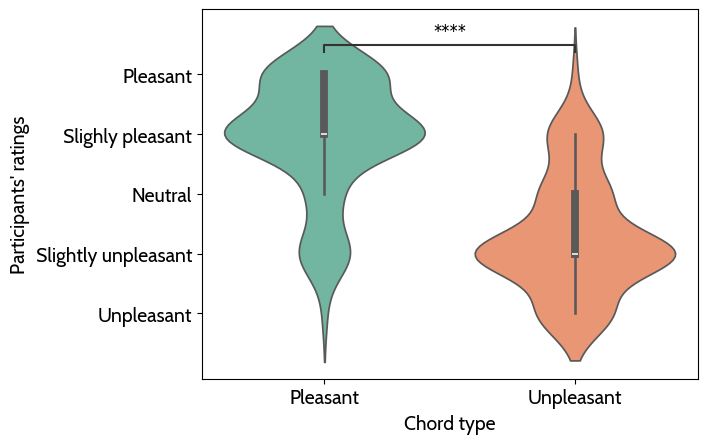

In [6]:
#| label: fig:behav-loc-report
# # stat test
from statannotations.Annotator import Annotator

# violin plot the ratings for each music type (p and n)
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.violinplot(x='music_type', y='image_rating_idx', data=df, palette='Set2', hue='music_type')

annotator = Annotator(ax, [('p','n')], data=df, x='music_type', y='image_rating_idx', order=['p','n'])
annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
annotator.apply_and_annotate()

# edit y ticks and labels
plt.yticks([1, 2, 3, 4, 5], ['Unpleasant', 'Slightly unpleasant', 'Neutral', 'Slighly pleasant', 'Pleasant'])
plt.ylabel("Participants' ratings")

plt.xlabel('Chord type')
plt.xticks([0, 1], ['Pleasant', 'Unpleasant'])
plt.show()